In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 400)

## importing dataset

In [5]:
df_raw=pd.read_csv("P:\Python_DS\Data_Circle\Dataset\survey_results_public.csv")

In [6]:
df_raw.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testing;Observability tools,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Auditory material (e.g., podcasts);Written Tutorials;Stack Overflow;Interactive tutorial",...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) and (more often) continuous delivery,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, freelancer, or self-employed",Remote,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Interactive tutorial;Certification videos",...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microser

In [7]:
df = df_raw.dropna(subset= ['ConvertedCompYearly'])


## Dataset Analysis
    *preliminary analysis of the data:
    checking columns, the null count, turning categorical data to numerical ones

In [8]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [29]:
df.loc[:,"ConvertedCompYearly"] =  df.loc[:,"ConvertedCompYearly"].astype(int)                

C:\Users\ASUS\Documents\sample_project_01\env\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           48019 non-null  int64  
 1   Q120                                 48019 non-null  object 
 2   MainBranch                           48019 non-null  object 
 3   Age                                  48019 non-null  object 
 4   Employment                           48007 non-null  object 
 5   RemoteWork                           47940 non-null  object 
 6   CodingActivities                     47918 non-null  object 
 7   EdLevel                              48019 non-null  object 
 8   LearnCode                            47935 non-null  object 
 9   LearnCodeOnline                      38414 non-null  object 
 10  LearnCodeCoursesCert                 20744 non-null  object 
 11  YearsCode                   

In [11]:
df[df.Q120 == "I agree"].count()

ResponseId             48019
Q120                   48019
MainBranch             48019
Age                    48019
Employment             48007
                       ...  
ProfessionalTech       31726
Industry               27747
SurveyLength           47510
SurveyEase             47548
ConvertedCompYearly    48019
Length: 84, dtype: int64

--We can remove column Q120
--We can turn RemoteWork [remote, in person, hybrid] input to numerical

In [12]:
df['AISearchHaveWorkedWith'].str.split(';')

1                                  [ChatGPT]
2                                        NaN
3                                        NaN
4                                  [ChatGPT]
5        [ChatGPT, Google Bard AI, Neeva AI]
                        ...                 
89162                                    NaN
89166                              [ChatGPT]
89167                              [ChatGPT]
89170                              [ChatGPT]
89171                                    NaN
Name: AISearchHaveWorkedWith, Length: 48019, dtype: object

In [13]:
df['ConvertedCompYearly'].describe()

count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

array([[<AxesSubplot:title={'center':'ConvertedCompYearly'}>]],
      dtype=object)

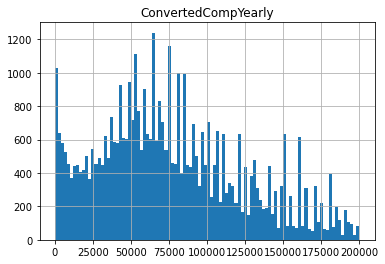

In [14]:
df[df.ConvertedCompYearly < 200000].hist("ConvertedCompYearly", bins=100)

In [15]:
df[df.ConvertedCompYearly< 200000].ConvertedCompYearly.median()

69608.0

In [16]:
filt = df.Employment.value_counts().reset_index().head(7)['index'].tolist()

In [17]:
df.Employment.value_counts().reset_index()

,index,Employment
0,"Employed, full-time",39301
1,"Independent contractor, freelancer, or self-employed",3906
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",3291
3,"Employed, part-time",906
4,"Independent contractor, freelancer, or self-employed;Employed, part-time",240
5,"Employed, full-time;Employed, part-time",154
6,"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",109
7,I prefer not to say,34
8,Retired,33
9,"Independent contractor, freelancer, or self-employed;Retired",16


In [18]:
df[df['Employment'].isin(filt)].groupby('Employment').agg({'ConvertedCompYearly' : ['mean', 'median']}).reset_index()

Employment  \
                                                                                                  
0                                                                           Employed, full-time   
1                                                       Employed, full-time;Employed, part-time   
2                      Employed, full-time;Independent contractor, freelancer, or self-employed   
3  Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time   
4                                                                           Employed, part-time   
5                                          Independent contractor, freelancer, or self-employed   
6                      Independent contractor, freelancer, or self-employed;Employed, part-time   

  ConvertedCompYearly           
                 mean   median  
0        98395.004071  74963.0  
1        61553.357143  45153.0  
2        99956.732604  74963.0  
3        78314.128440  49503.0  
4        96414.912804  47595.0  
5       138855.595494  80317.0  
6        72977.350000  54819.0

--The difference between med and mean

In [19]:
df['Country'].value_counts().reset_index().head(20)

,index,Country
0,United States of America,11881
1,Germany,3970
2,United Kingdom of Great Britain and Northern Ireland,3544
3,Canada,2105
4,India,1868
5,France,1801
6,Netherlands,1362
7,Poland,1266
8,Brazil,1252
9,Australia,1211


In [44]:
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

(array([22540.,  5654., 13045.,     0.,   222.,  2297.,     0.,  1596.,
         2169.,   496.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

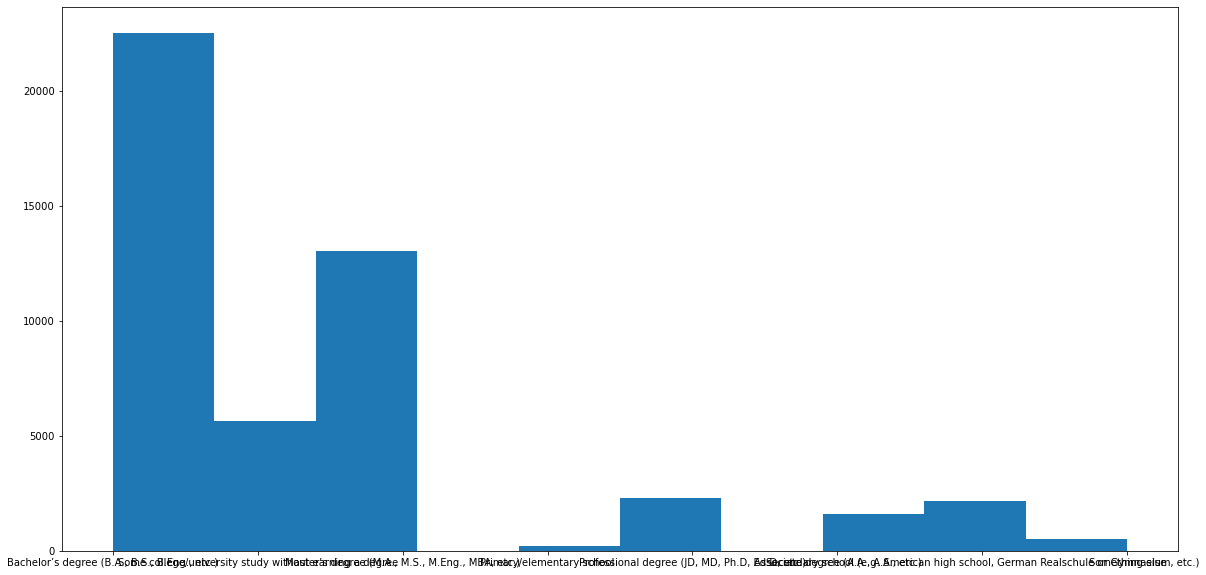

In [21]:
plt.figure(figsize=(20,10))
plt.hist(df.EdLevel)

C:\Users\ASUS\Documents\sample_project_01\env\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['9', '23', '7', '4', '21', '3', '15', 'Less than 1 year', '10',
       '2', '6', '14', '5', '19', '13', '16', '28', '30', '11', '8', '24',
       '40', '17', '29', '25', '12', '20', '18', '50', '27', '43', '26',
       '1', '38', '33', '22', '35', 'nan', '31', '34', '32', '37', '42',
       'More than 50 years', '36', '39', '41', '44', '48', '45', '46',
       '47', '49'], dtype=object)

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 53 artists>

,YearsCodePro,ConvertedCompYearly
0,1,36737.0
1,10,78000.0
2,11,80317.0
3,12,82794.5
4,13,85672.0


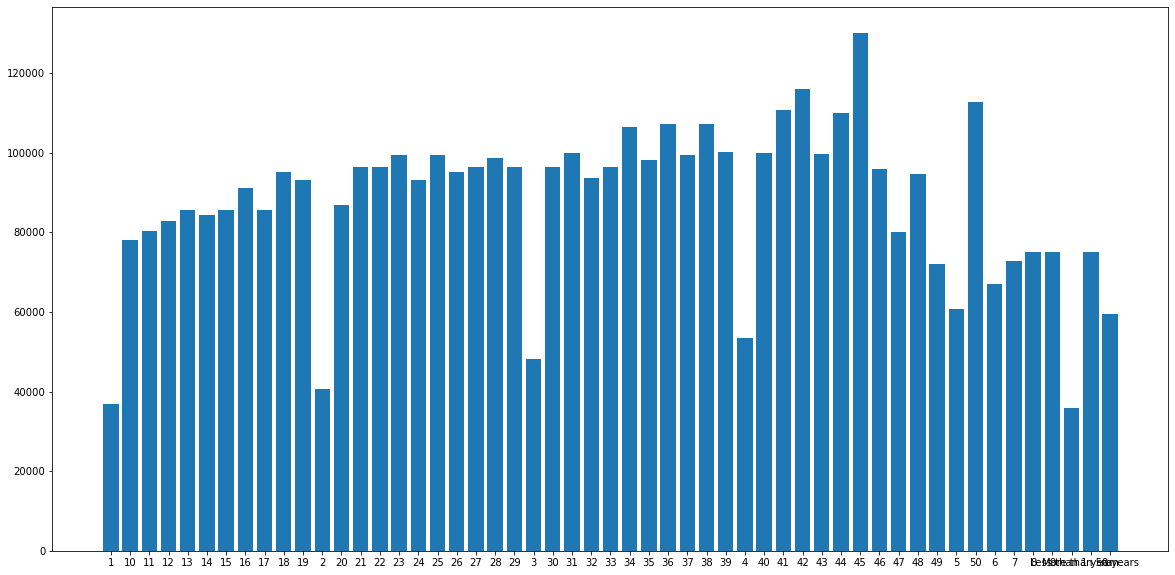

In [42]:
df['YearsCodePro'].fillna('nan', inplace=True)
df["YearsCodePro"].unique()
#plt.scatter(df.YearsCodePro, df.ConvertedCompYearly)
df_bar = df.loc[df["ConvertedCompYearly"] < 200000,['YearsCodePro','ConvertedCompYearly']].groupby('YearsCodePro').\
median().sort_values("YearsCodePro").reset_index()

plt.figure(figsize=(20,10))
plt.bar(df_bar.YearsCodePro, df_bar.ConvertedCompYearly)
df_bar.head()

Change the str to numbers

In [ ]:
plt.scatter(df.YearsCodePro, df.ConvertedCompYearly)

### Ideas to go on
-plots and visualisation
-salaries with: countries(continent)/only Europe/ job title/experience
-survey from previous years

In [23]:
countries=pd.read_csv("P:\Python_DS\Data_Circle\Countries.csv", on_bad_lines='skip')
countries.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [24]:
euCountries = countries[countries.Continent == "Europe"]["Country"]
euCountries.tolist()

dfEU = df[df.Country.isin(euCountries)]  
dfEU.head()

countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  194 non-null    object
 1   Country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [25]:
df.merge(countries, on="Country", how="right")

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,Continent
0,3642.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Written Tutorials;Stack Overflow;Interactive tutorial,...,1-2 times a week,NaN,60-120 minutes a day,Less than 15 minutes a day,None of these,NaN,Appropriate in length,Neither easy nor difficult,6586.0,Africa
1,5257.0,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",35-44 years old,"Employed, full-time",In-person,Contribute to open-source projects;Professional development or self-paced learning from online courses,Something else,"Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Written Tutorials;Click to write Choice 20;Stack Overflow;Interactive tutorial,...,3-5 times a week,Never,30-60 minutes a day,30-60 minutes a day,NaN,NaN,Too short,Easy,7318.0,Africa
2,7087.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Blogs with tips and tricks;Books;How-to videos;Written Tutorials;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,12000.0,Africa
3,8722.0,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses;Freelance/contract work;School or academic work;Other (please specify):,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other (please specify):,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,37776.0,Africa
4,22637.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Written-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Interactive tutorial",...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,26345.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31381,83738.0,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",25-34 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Written Tutorials;Click to write Choice 20;Stack Overflow,...,1-2 times a week,Never,15-30 minutes a day,30-60 minutes a day,DevOps function;Automated testing,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,55719.0,South America
31382,85160.0,I agree,I am a developer by profession,25-34 years o

In [54]:
df_2 = df.loc[df["Country"].isin(["United States of America","Germany","United Kingdom of Great Britain and Northern Ireland"]),['EdLevel','DevType','Country','ConvertedCompYearly']]
df_2.head()

,EdLevel,DevType,Country,ConvertedCompYearly
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Senior Executive (C-Suite, VP, etc.)",United States of America,285000
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",United States of America,250000
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",United States of America,156000
5,Some college/university study without earning a degree,"Developer, back-end",United Kingdom of Great Britain and Northern Ireland,96828
6,Some college/university study without earning a degree,"Developer, full-stack",United States of America,135000


In [55]:
df_2.DevType.value_counts().reset_index().head(15)

,index,DevType
0,"Developer, full-stack",7054
1,"Developer, back-end",3420
2,"Developer, front-end",1078
3,"Developer, desktop or enterprise applications",1048
4,Other (please specify):,702
5,Engineering manager,649
6,"Developer, embedded applications or devices",617
7,"Developer, mobile",502
8,"Engineer, data",411
9,Data scientist or machine learning specialist,396


In [69]:
df_3 = df_2.groupby(['Country','DevType','EdLevel']).agg({'ConvertedCompYearly' : ['mean', 'min', 'max', 'count']})\
.reset_index()
df_3.columns = ['Country','DevType','EdLevel','mean', 'min', 'max', 'count']
df_3 = df_3[df_3['count']>20]
df_3

,Country,DevType,EdLevel,mean,min,max,count
1,Germany,Academic researcher,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",56910.615385,41,117798,91
2,Germany,Academic researcher,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",72845.488889,48190,149925,45
10,Germany,Cloud infrastructure engineer,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",100499.678571,51403,342687,28
22,Germany,Data scientist or machine learning specialist,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",89019.078947,48190,235597,38
23,Germany,Data scientist or machine learning specialist,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",98675.380952,67466,160634,21
...,...,...,...,...,...,...,...
526,United States of America,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",331734.586777,60,11000000,121
527,United States of America,"Senior Executive (C-Suite, VP, etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",234458.481481,250,900000,54
531,United States of America,"Senior Executive (C-Suite, VP, etc.)",Some college/university study without earning a degree,232314.814815,2500,500000,27
537,United States of America,System administrator,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",98196.809524,45000,300000,42


In [26]:
#def c2c(country):
    #for i in country:
        

In [27]:
#df['Continent']= countries[countries.Country == df['Country']

In [28]:
#df.groupby('Country').agg({'ConvertedCompYearly' : ['mean', 'median']}).reset_index()